In [10]:
def normalize(arr):
    import numpy as np
    return (arr-np.min(arr))/(np.max(arr)-np.min(arr))


def plot_cube(cube, name, angle=320, i_max=100, j_max=100, k_max=100):
    '''
    Helper function to Show grid in 3d
    
    Args: 
        cube - np.array in 3D
        name - name of grid
        angle - angle to visualize (Default - 320)
        i_max - dimension in X (Default - 100)
        j_max - dimension in Y (Default - 100)
        k_max - dimension in Z (Default - 100)
        
        #https://terbium.io/2017/12/matplotlib-3d/
    '''
    import numpy as np
    import pandas as pd
    from matplotlib import cm
    import matplotlib.colors
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    from mpl_toolkits.mplot3d import Axes3D
    %matplotlib inline
    
    c_min = cube.min()
    c_max = cube.max()
    
    c = np.arange(c_min, c_max, (c_max-c_min)/20)
    
    cube = normalize(cube)

    facecolors = cm.coolwarm(cube) #https://matplotlib.org/users/colormaps.html
    facecolors[:,:,:,-1] = cube != 0 #make transparent only zero values
    
    filled = facecolors[:,:,:,-1] != 0
    x, y, z = np.indices(np.array(filled.shape) + 1)
    #z = [11,12]
    fig = plt.figure(figsize=(30, 30))
    ax = fig.gca(projection='3d')
    ax.view_init(30, angle)
    ax.set_xlim(right=i_max)
    ax.set_ylim(top=j_max)
    ax.set_zlim(top=k_max)
    
    surf = ax.voxels(x, y, z, filled, facecolors=facecolors, edgecolor='k' )

    norm = mpl.colors.Normalize(vmin=c_min, vmax=c_max)
    #norm = mpl.colors.BoundaryNorm(vmin=c.min(), vmax=c.max())
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=cm.coolwarm)
    cmap.set_array([])

    fig.colorbar(cmap, ticks=c)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.text2D(0.05, 0.95, name, transform=ax.transAxes, fontsize=16)
    plt.show();



In [11]:
def OneDim_to_ThreeDim_Converter(i_max, j_max, k_max, idx, path):

    '''
    Helper function to convert 1D (OneDim) np.array to 3d (ThreeDim)
    
    Args: 
        i_max - dimension in X
        j_max - dimension in Y
        k_max - dimension in Z
        idx - grid index
        path to csv file
        
    Return:
        ThreeDim - 3d np.array
        name - name of grid
    '''

    import pandas as pd
    import numpy as np
    
    #приводим массив к 3D размерности грида.    
    Three_Dim = np.array(np.zeros((i_max, j_max, k_max)))
    i = 0
    j = 0
    k = 0
    z = 0

    df = pd.read_csv(path)
    One_Dim = df.iloc[:, idx].values
    name = list(df.columns.values)[idx]

    while k <= k_max-1:
        while j <= j_max-1:
            while i <= i_max-1:
                Three_Dim[i, j ,k] = One_Dim[z]
                i += 1
                z += 1
            i = 0
            j += 1
        j = 0
        k += 1

    return (Three_Dim, name)


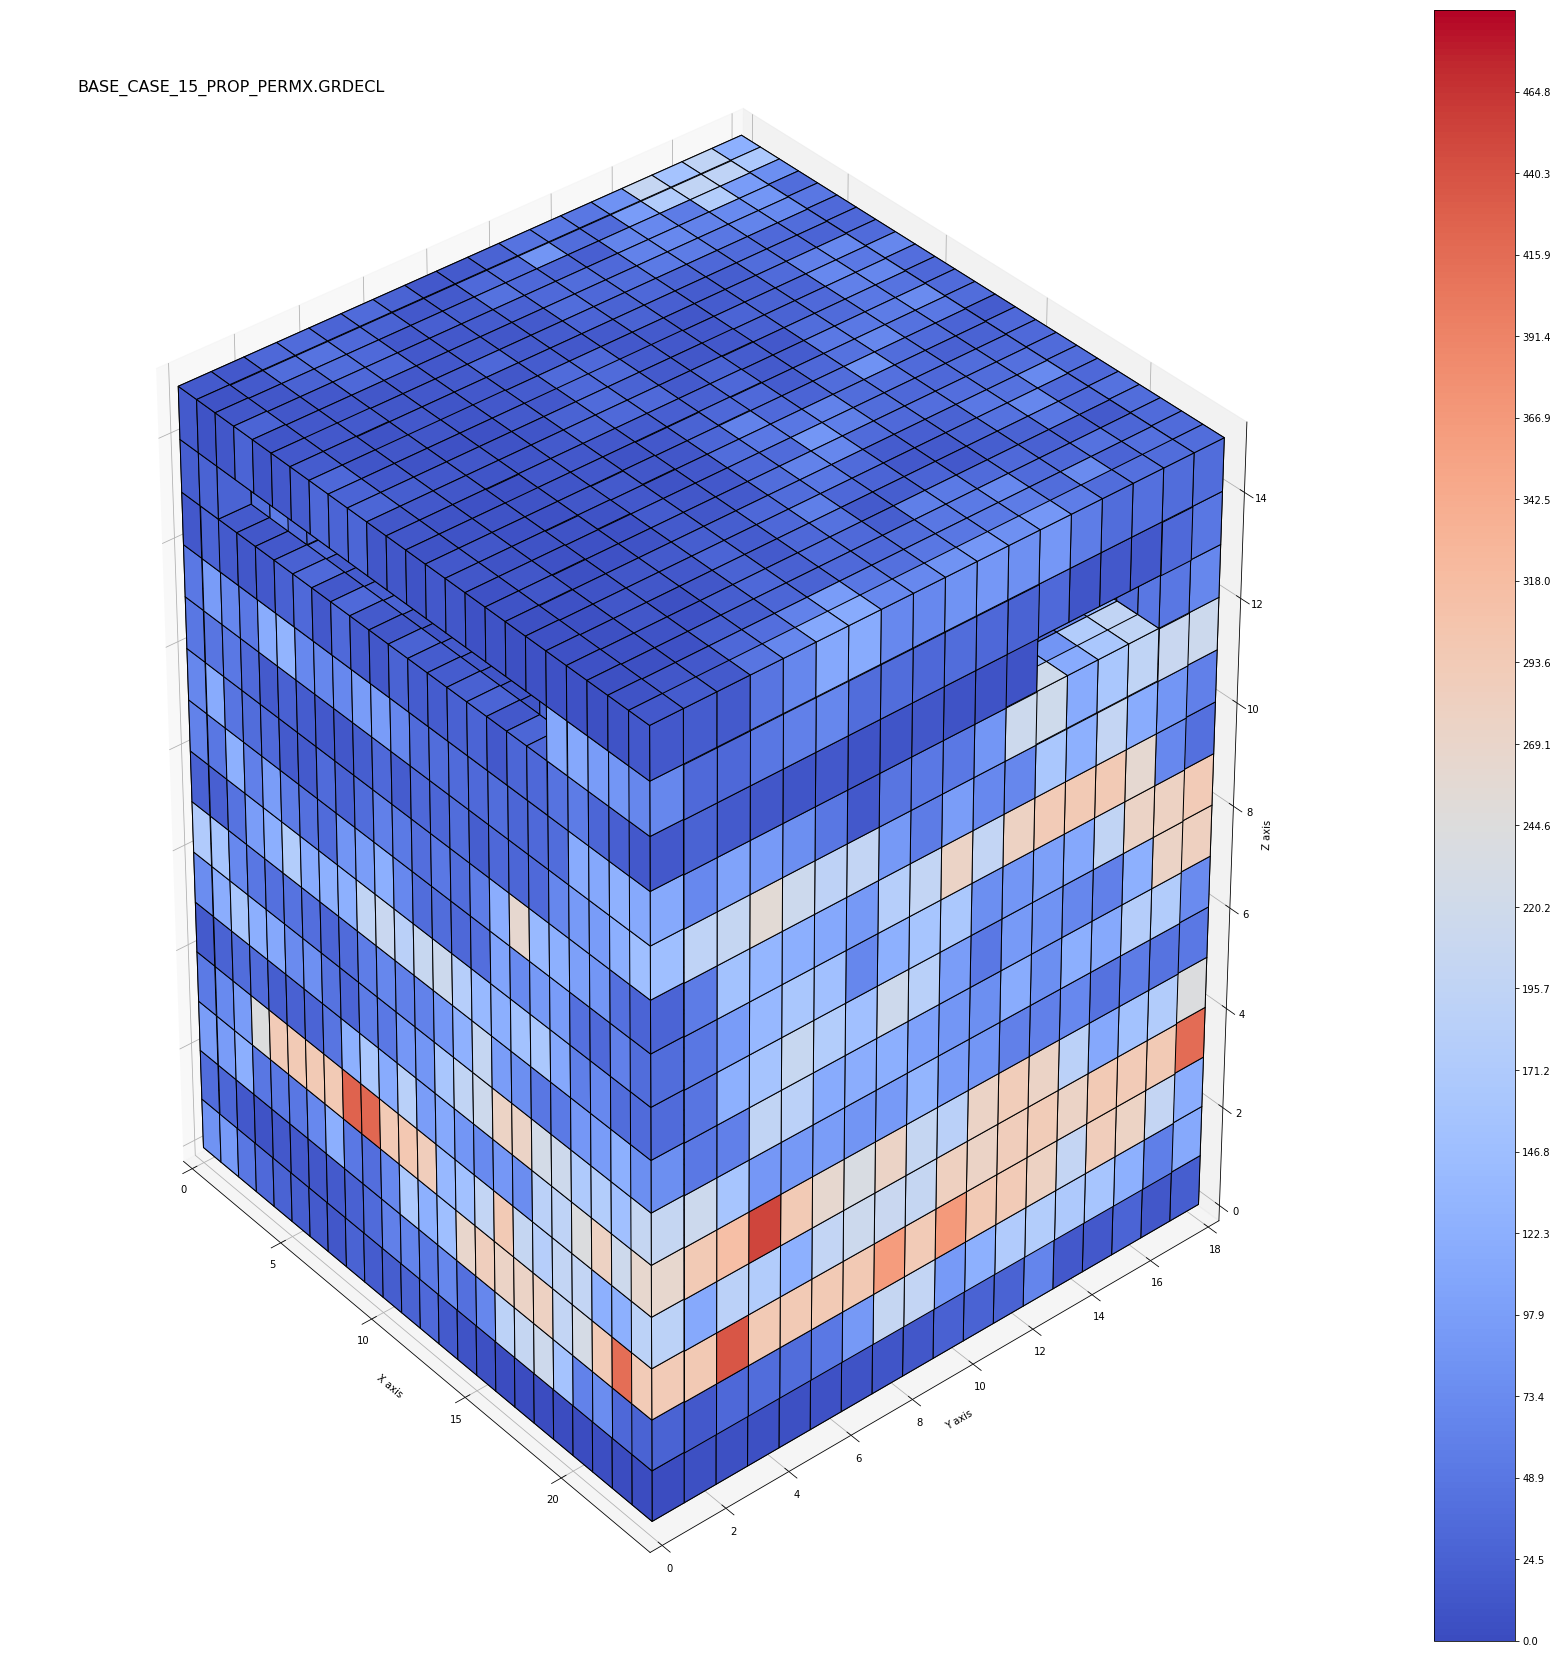

In [18]:

i_max = 24 # X grid size
j_max = 18 # Y grid size
k_max = 15 # Z grid size
idx = 0 # index of grid in dataset
path  = "../DATA/_PERMX.csv" #path to dataset

cube, name = OneDim_to_ThreeDim_Converter(i_max, j_max, k_max, idx, path)
plot_cube(cube[:,:,:], name, 320, i_max, j_max, k_max)
